In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


In [37]:
data =pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv")

In [38]:
data

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789
...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [40]:
X=data[["NO","PM25"]]
y=data["PM10"]#variable objetivo

In [41]:
split_index=int(len(data)*0.8)
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [42]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [44]:
svr_model=SVR(kernel="rbf",C=1.0,epsilon=0.1)
svr_model.fit(X_train_scaled,y_train)

SVR()

In [45]:
y_test_pred = svr_model.predict(X_test_scaled) # Changed x_test_scaled to X_test_scaled

In [46]:
y_test_pred

array([27.40761917, 35.77793633, 32.17429679, 22.82518235, 30.48430695,
       41.11594173, 37.58428436, 28.09167337, 37.97537459, 23.91286787,
       19.20328149, 18.82442937, 21.19763671, 27.36263668, 25.53968469,
       33.993949  , 19.66838841, 33.65115323, 31.98673445, 34.8672092 ,
       40.043503  , 33.25375081, 21.78407896, 20.94532471, 28.91295932,
       33.35456443, 49.15430622, 20.72209997, 20.36709571, 38.68956257,
       21.27436979, 42.64025845, 38.3963939 , 28.35836922, 47.08577752,
       52.62871896, 43.30089722, 36.27219649, 36.45515416, 30.38567287,
       42.74125803, 42.05070895, 38.25157147, 33.90690986, 25.88341386,
       36.67566441, 47.40008916, 48.39883073, 37.43617287, 28.27971234,
       26.49897309, 27.27665678, 25.41516366, 40.04589406, 42.03444668,
       41.80978603, 22.10144211, 27.46457306, 32.31344689, 28.35958602,
       22.32938689, 36.24948179, 51.15879227, 34.23562239, 50.93611281,
       50.6372418 , 46.17460214, 46.46979322, 40.9436209 , 36.06

In [26]:
test_mse=mean_squared_error(y_test,y_test_pred)
test_r2=r2_score(y_test,y_test_pred)

In [27]:
test_mse

63.310573032474885

In [28]:
test_r2

0.6896354071907487

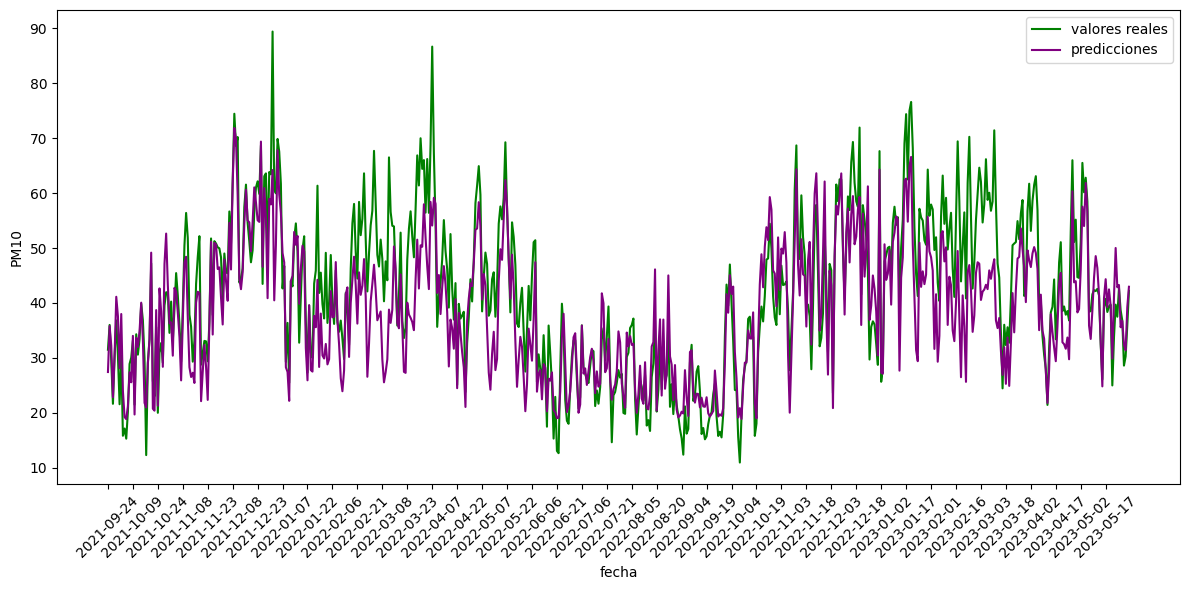

In [35]:
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]["fecha"], y_test, label="valores reales",color="green")
plt.plot(data.iloc[split_index:]["fecha"], y_test_pred, label="predicciones", color="purple")
plt.xlabel("fecha")
plt.ylabel("PM10")
plt.legend()
plt.xticks(data.iloc[split_index:]["fecha"][::15],rotation=45)
plt.tight_layout()
plt.show()




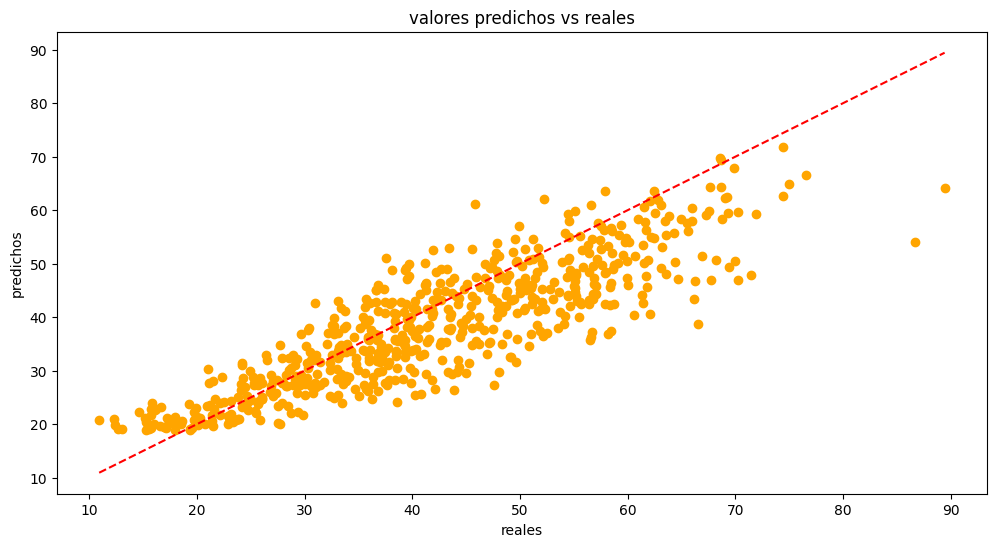

In [58]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_test_pred,color="orange")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--",label="linea ideal")
plt.title("valores predichos vs reales") # Changed plt.titler to plt.title
plt.xlabel("reales")
plt.ylabel("predichos")
plt.show()

In [62]:
data["fecha"]=pd.to_datetime(data["fecha"])

In [63]:
data["mes"]=data["fecha"].dt.month

In [68]:
data["dia"]=data["fecha"].dt.day

In [69]:
data["dia_de_semana"]=data["fecha"].dt.dayofweek

In [70]:
data["fin_de_semana"]=(data["fecha"].dt.dayofweek>=5).astype(int)

In [71]:
data

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2,mes,dia,dia_de_semana,fin_de_semana
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723,1,1,3,0
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052,1,2,4,0
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937,1,3,5,1
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061,1,4,6,1
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683,5,27,5,1
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658,5,28,6,1
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588,5,29,0,0
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818,5,30,1,0


In [72]:
data.head(25)

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2,mes,dia,dia_de_semana,fin_de_semana
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723,1,1,3,0
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052,1,2,4,0
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937,1,3,5,1
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061,1,4,6,1
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789,1,5,0,0
5,2015-01-06,0.748952,27.977346,23.242718,51.213592,12.902256,40.321608,21.113712,4.024024,1,6,1,0
6,2015-01-07,0.443254,11.297114,16.259762,27.594228,17.055130,30.054598,10.737643,2.192547,1,7,2,0
7,2015-01-08,0.533528,10.527586,21.625862,32.155172,19.150555,33.313953,14.501946,1.962233,1,8,3,0
8,2015-01-09,1.094574,41.795181,32.526678,74.283993,19.482813,55.188679,29.085106,2.781046,1,9,4,0
9,2015-01-10,0.770722,23.455717,27.468599,50.919485,22.689552,39.798507,24.071895,2.559006,1,10,5,1


In [74]:
from sklearn.feature_selection import SelectKBest, f_regression

In [75]:
x=data.drop(columns=["fecha", "PM10"])

In [76]:
x

,CO,NO,NO2,NOX,O3,PM25,SO2,mes,dia,dia_de_semana,fin_de_semana
0,1.050696,22.765528,24.225155,46.987578,23.175150,78.953405,11.554723,1,1,3,0
1,0.807585,32.249608,21.554160,53.800628,17.268366,15.449438,1.895052,1,2,4,0
2,0.640755,21.686916,19.394081,41.071651,15.486486,12.915129,1.436937,1,3,5,1
3,0.726940,24.606272,19.560976,44.165505,17.329032,16.838284,1.809061,1,4,6,1
4,0.530815,11.443182,20.990260,32.439935,14.470588,12.667774,8.315789,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3068,0.256722,3.750583,17.284351,21.629371,41.580645,21.170139,2.735683,5,27,5,1
3069,0.286826,3.458886,16.349241,20.230769,36.913761,18.454861,2.331658,5,28,6,1
3070,0.482077,11.448113,24.521154,36.436321,29.697068,16.692857,1.071588,5,29,0,0
3071,0.441455,13.893519,22.615530,37.224537,36.185971,20.888525,1.181818,5,30,1,0


In [77]:
y=data["PM10"]

In [78]:
selector=SelectKBest(score_func=f_regression,k=8)
x_selected=selector.fit_transform(x,y)

In [79]:
x_selected

array([[ 1.05069583, 22.76552795, 24.22515528, ..., 78.95340502,
        11.55472264,  1.        ],
       [ 0.80758483, 32.24960754, 21.55416013, ..., 15.4494382 ,
         1.89505247,  1.        ],
       [ 0.64075547, 21.68691589, 19.394081  , ..., 12.91512915,
         1.43693694,  1.        ],
       ...,
       [ 0.48207721, 11.44811321, 24.52115385, ..., 16.69285714,
         1.07158837,  5.        ],
       [ 0.44145455, 13.89351852, 22.6155303 , ..., 20.88852459,
         1.18181818,  5.        ],
       [ 0.34040367,  5.35306554, 19.37258348, ..., 24.78709677,
         1.40208333,  5.        ]])

In [80]:
selected_features=x.columns[selector.get_support()]

In [81]:
selected_features

Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM25', 'SO2', 'mes'], dtype='object')

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
rt_model=RandomForestRegressor(random_state=42)

In [86]:
rt_model.fit(x,y) # Changed rf_model to rt_model

RandomForestRegressor(random_state=42)

In [90]:
importancia_df=pd.DataFrame({"Caracteristica":x.columns,
                             "Importancia": rt_model.feature_importances_}).sort_values(by="Importancia",ascending=False)

In [91]:
importancia_df

,Caracteristica,Importancia
5,PM25,0.757290
7,mes,0.079192
2,NO2,0.030219
4,O3,0.029672
3,NOX,0.027143
1,NO,0.025293
6,SO2,0.016471
0,CO,0.014492
8,dia,0.011908
9,dia_de_semana,0.007141


In [93]:
redmet=pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/redmet_2023_05.csv")

In [94]:
redmet["fecha"]=pd.to_datetime(redmet["fecha"])

In [95]:
data["fecha"]=pd.to_datetime(data["fecha"])

In [96]:
union=pd.merge(data,redmet,on="fecha",how="inner")

In [97]:
union

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2,mes,dia,dia_de_semana,fin_de_semana,RH,TMP,WDR,WSP
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723,1,1,3,0,60.565476,13.385714,156.723039,1.933333
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052,1,2,4,0,52.452381,13.567262,176.710784,2.559804
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937,1,3,5,1,55.763636,13.893333,190.830846,2.136318
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061,1,4,6,1,62.776786,12.536012,196.306373,2.592647
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789,1,5,0,0,70.271845,9.070227,266.889764,2.963517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683,5,27,5,1,51.899130,19.453565,190.198664,2.187646
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658,5,28,6,1,59.949565,17.375826,183.542571,2.092154
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588,5,29,0,0,58.837743,17.039153,169.527919,1.952284
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818,5,30,1,0,50.145719,18.684699,184.998255,1.978709
